In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Q1
covid = pd.read_csv('covid.csv', index_col=0)
covid.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,age_group
id,,,,,,,,,,,,,,,,,,,,,
16169f,Male,Outpatient,4/5/2020,2/5/2020,9999-99-99,Data Data missing,No,27,Data missing,No,...,No,No,No,No,No,No,No,Positive,Data missing,20-29
1009bf,Male,Outpatient,19-03-2020,17-03-2020,9999-99-99,Data missing,No,24,Data missing,No,...,No,No,No,No,No,No,Data missing,Positive,Data missing,20-29
167386,Female,Inpatient,6/4/2020,1/4/2020,9999-99-99,No,No,54,No,No,...,No,No,No,Yes,No,No,Data missing,Positive,No,50-59
0b5948,Male,Inpatient,17-04-2020,10/4/2020,9999-99-99,No,Yes,30,Data missing,No,...,No,No,No,No,No,No,Data missing,Positive,No,30-39
0d01b5,Female,Inpatient,13-04-2020,13-04-2020,22-04-2020,No,No,60,No,Yes,...,Yes,No,Yes,No,No,No,Data missing,Positive,No,60-69


In [4]:
covid_pos = covid[covid['covid_res'] == 'Positive']
covid_pos.groupby(['age_group', 'sex']).size()

age_group  sex   
20-29      Female    14378
           Male      14751
30-39      Female    22940
           Male      26083
40-49      Female    22556
           Male      27216
50-59      Female    17837
           Male      23531
60-69      Female    10625
           Male      14905
70-79      Female     5464
           Male       7731
< 20       Female     3420
           Male       3415
>= 80      Female     2638
           Male       3167
dtype: int64

/var/folders/gt/ndv7xrg17c95c6s42ycl5ch40000gn/T/ipykernel_2349/2426626250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_pos['entry_date'] = pd.to_datetime(covid_pos['entry_date'], dayfirst=True)


<AxesSubplot:ylabel='sex'>

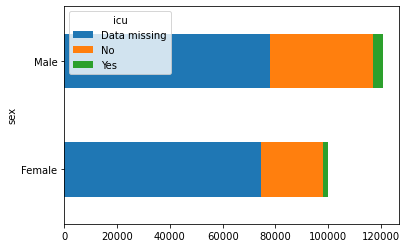

In [5]:
#q2
covid_pos['entry_date'] = pd.to_datetime(covid_pos['entry_date'], dayfirst=True)
pd.crosstab(covid_pos['sex'], covid_pos['icu']).plot.barh(stacked=True)

In [6]:
#Q3
covid_pos_die = covid_pos[covid_pos['date_died'] != '9999-99-99']
covid_pos_die['date_died'] = pd.to_datetime(covid_pos_die['date_died'], dayfirst=True)
covid_pos_die['date_died'].dtype

/var/folders/gt/ndv7xrg17c95c6s42ycl5ch40000gn/T/ipykernel_2349/3502401942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_pos_die['date_died'] = pd.to_datetime(covid_pos_die['date_died'], dayfirst=True)


dtype('<M8[ns]')

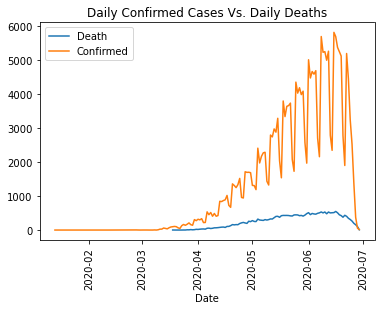

In [8]:
dieByDate = covid_pos_die.groupby(covid_pos_die['date_died'].dt.date).size()
cx1 = dieByDate.plot(label='Death', rot=90)
confirmByDate = covid_pos.groupby(covid_pos['entry_date'].dt.date).size()
cx2 = confirmByDate.plot(label='Confirmed', rot=90)
plt.xlabel('Date')
plt.title('Daily Confirmed Cases Vs. Daily Deaths')
plt.legend()

Text(0.5, 1.0, 'Daily Death')

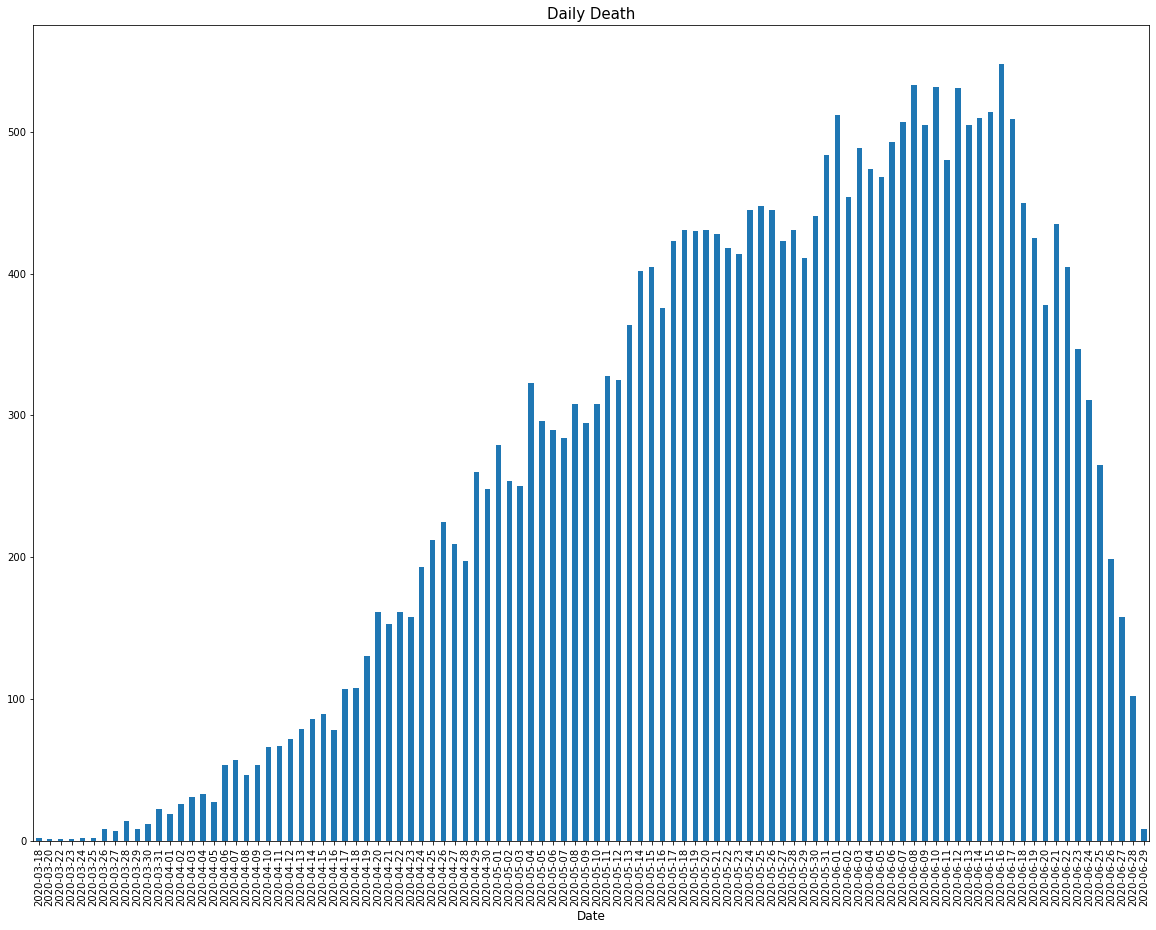

In [9]:
#q4
cx = dieByDate.plot.bar(figsize=(20, 15))
cx.set_xlabel('Date', size=12)
cx.set_title('Daily Death', size=15)

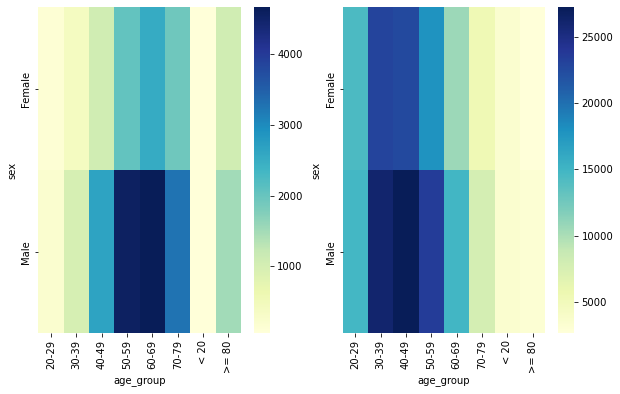

In [10]:
#Q5
import seaborn as sns
sex_ageGroup_ct = pd.crosstab(covid_pos['sex'], covid_pos['age_group'])
sex_ageGroup_die_ct = pd.crosstab(covid_pos_die['sex'], covid_pos_die['age_group'])
fig,axes = plt.subplots(1,2, figsize = (10,6))
ax1 = sns.heatmap(sex_ageGroup_die_ct, cmap='YlGnBu',ax = axes[0])
ax2 = sns.heatmap(sex_ageGroup_ct,cmap='YlGnBu',ax = axes[1])

In [11]:
#q6
covid_60above = covid_pos[covid_pos['age'] >= 60]
covid_60below = covid_pos[covid_pos['age'] < 60]
group_60above = covid_60above.groupby(covid_60above['entry_date'].dt.date).size()
group_60below = covid_60below.groupby(covid_60below['entry_date'].dt.date).size()

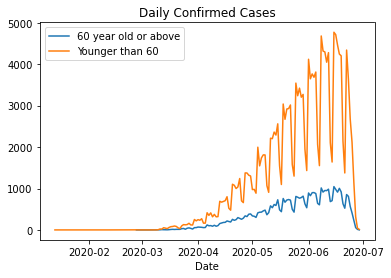

In [12]:
fig = plt.figure()
group_60above.plot(label='60 year old or above')
group_60below.plot(label='Younger than 60')
plt.title('Daily Confirmed Cases')
plt.xlabel('Date')
plt.legend()

In [14]:
#q7
covid_pos_alive = covid_pos[covid_pos['date_died'] == '9999-99-99']
ageGroup_diabetes_die = pd.crosstab(covid_pos_die['age_group'], covid_pos_die['diabetes'])
ageGroup_diabetes_alive = pd.crosstab(covid_pos_alive['age_group'], covid_pos_alive['diabetes'])
ageGroup_hypertension_alive = pd.crosstab(covid_pos_alive['age_group'], covid_pos_alive['hypertension'])
ageGroup_hypertension_die = pd.crosstab(covid_pos_die['age_group'], covid_pos_die['hypertension'])
ageGroup_cardiovascular_alive = pd.crosstab(covid_pos_alive['age_group'], covid_pos_alive['cardiovascular'])
ageGroup_cardiovascular_die = pd.crosstab(covid_pos_die['age_group'], covid_pos_die['cardiovascular'])

Text(0, 0.5, 'Age Group')

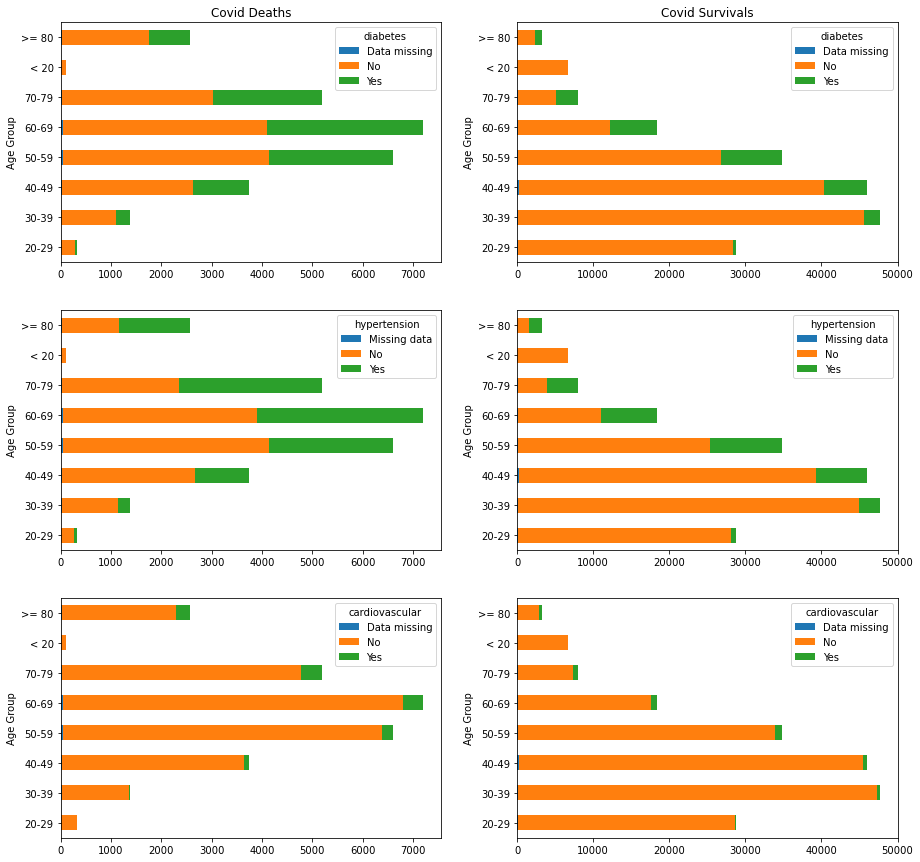

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
#how many percent of the chart for spacing
#plt.subplots_adjust(wspace=0.5, hspace=0.5) 
ageGroup_diabetes_die.plot.barh(stacked=True, ax=axes[0,0])
ageGroup_diabetes_alive.plot.barh(stacked=True, ax=axes[0,1])
ageGroup_hypertension_die.plot.barh(stacked=True, ax=axes[1, 0])
ageGroup_hypertension_alive.plot.barh(stacked=True, ax=axes[1, 1])
ageGroup_cardiovascular_die.plot.barh(stacked=True, ax=axes[2,0])
ageGroup_cardiovascular_alive.plot.barh(stacked=True, ax=axes[2, 1])
axes[0,0].set_title('Covid Deaths')
axes[0,1].set_title('Covid Survivals')
axes[0,0].set_ylabel('Age Group')
axes[0,1].set_ylabel('Age Group')
axes[1,0].set_ylabel('Age Group')
axes[1,1].set_ylabel('Age Group')
axes[2,0].set_ylabel('Age Group')
axes[2,1].set_ylabel('Age Group')

In [20]:
#q8
covid_pos_die = covid_pos[covid_pos['date_died'] != '9999-99-99']
covid_pos_die['date_died'] = pd.to_datetime(covid_pos_die['date_died'], dayfirst=True)
covid_pos_die['days_to_death'] = (covid_pos_die['date_died'].dt.date - covid_pos_die['date_symptoms'].dt.date).dt.days
covid_pos_die.groupby('age_group')['days_to_death'].mean().sort_values()

/var/folders/gt/ndv7xrg17c95c6s42ycl5ch40000gn/T/ipykernel_2349/4265371818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_pos_die['date_died'] = pd.to_datetime(covid_pos_die['date_died'], dayfirst=True)
/var/folders/gt/ndv7xrg17c95c6s42ycl5ch40000gn/T/ipykernel_2349/4265371818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_pos_die['days_to_death'] = (covid_pos_die['date_died'].dt.date - covid_pos_die['date_symptoms'].dt.date).dt.days


age_group
< 20      9.476190
>= 80    10.117121
20-29    10.832317
70-79    11.211427
30-39    11.336957
40-49    11.731851
60-69    11.838867
50-59    11.894976
Name: days_to_death, dtype: float64

In [21]:
#Q9
usahousing = pd.read_csv(('USA_Housing.csv'))
usahousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [22]:
from sklearn.cluster import KMeans
data = usahousing[['Avg. Area Income', 'Price']]
kmean = KMeans(n_clusters = 3, random_state = 0).fit(usahousing[['Avg. Area Income', 'Price']])
kmean.cluster_centers_

array([[  68327.52068834, 1221596.7237848 ],
       [  76810.08132525, 1655612.64948534],
       [  60079.23348665,  789492.3552742 ]])

In [23]:
kmean.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
labels = list(kmean.labels_)
for index in range(len(labels)):
    if labels[index] == 0:
        labels[index] = 'Higher Middle Class Area'
    elif labels[index] == 1:
        labels[index] = 'Rich Area'
    else:
        labels[index] = 'Lower Middle Class Area'
usahousing['Area Class'] = labels
usahousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Area Class
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",Higher Middle Class Area
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",Rich Area
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",Higher Middle Class Area
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,Higher Middle Class Area
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,Lower Middle Class Area
